## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

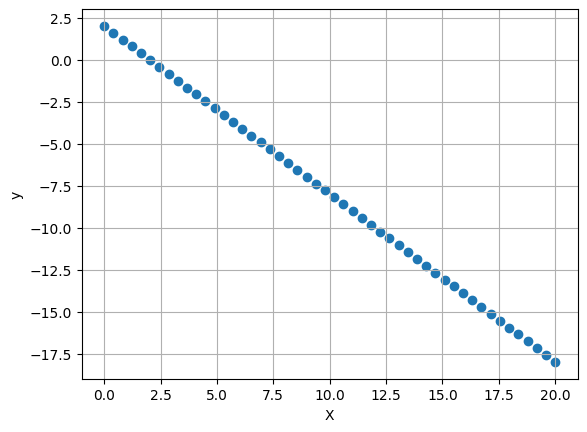

In [4]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [5]:
def LR_ADAGRAD(X, y, learning_rate=0.001, max_iterations=1000, stop_criteria=0.001, cost_tolerance=0.001, epsilon = (10**-8)):
    theta_0 = 0
    theta_1 = 0
    m = len(y)
    v_0 = 0
    v_1 = 0

    theta_0_vals = []
    theta_1_vals = []
    cost_vals = []
    y_pred_vals = []

    for iteration in range(max_iterations):
        y_pred = theta_0 + theta_1 * X
        Error_Vector = y_pred - y

        cost = (1 / (2 * m)) * np.sum(Error_Vector ** 2)

        d_theta_0 = (1 / m) * np.sum(Error_Vector)
        d_theta_1 = (1 / m) * np.sum(Error_Vector * X)
        Gradient_Vector = np.array([d_theta_0, d_theta_1])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

        theta_0_vals.append(theta_0)
        theta_1_vals.append(theta_1)
        cost_vals.append(cost)
        y_pred_vals.append(y_pred)

        print(f"\n****************** Iteration {iteration} ********************\n")
        print(f"Predicted Values h(x):\n{y_pred}\n")
        print(f"Error Vector:\n{Error_Vector}\n")
        print(f"Cost (J): {cost:.6f}\n")
        print(f"Gradient Vector:\n{Gradient_Vector}\n")
        print(f"Gradient Vector Norm: {Gradient_Vector_Norm:.6f}\n")

        if iteration > 0:
            if (abs(cost_vals[-1] - cost_vals[-2]) < cost_tolerance) or ((Gradient_Vector_Norm < stop_criteria)):

                print("****************** Training Report ********************\n")
                print(f"Gradient Descent converged after {iteration+1} epochs\n")
                print(f"theta_0_Opt : {theta_0}")
                print(f"theta_1_Opt : {theta_1}\n")
                print(f"Error Vector:\n {Error_Vector}")
                print("\nCost =", cost, "\n")
                print(f"\nh(x) = y_predict: \n {y_pred}")
                print(f"\ny_actual : \n {y}\n")

                break

        v_0 += (d_theta_0**2)
        v_1 += (d_theta_1**2)

        theta_0 -= learning_rate/(np.sqrt(v_0)+epsilon)*d_theta_0
        theta_1 -= learning_rate/(np.sqrt(v_1)+epsilon)*d_theta_1

    return y_pred, cost_vals, theta_0_vals, theta_1_vals, theta_0, theta_1, y_pred_vals

In [6]:
def loss_vs_epochs(cost_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(x=range(len(cost_vals)), y=cost_vals)
  plt.plot(cost_vals)
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.title('Loss vs. Iterations')
  plt.grid()
  plt.show()

def theta0_vs_loss(theta_0_vals, cost_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(x=theta_0_vals, y=cost_vals)
  plt.plot(theta_0_vals, cost_vals)
  plt.xlabel('Theta_0')
  plt.ylabel('Loss')
  plt.title('Theta_0 vs. Loss')
  plt.grid()
  plt.show()

def theta1_vs_loss(theta_1_vals, cost_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(x=theta_1_vals, y=cost_vals)
  plt.plot(theta_1_vals, cost_vals)
  plt.xlabel('Theta_1')
  plt.ylabel('Loss')
  plt.title('Theta_1 vs. Loss')
  plt.grid()
  plt.show()

def plot_all_regressions(X, y, y_pred_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(X, y)
  for y in y_pred_vals:
    plt.plot(X, y, color = 'r')
    plt.xlabel('X')
    plt.ylabel('y')
  plt.grid()
  plt.show()

def plot_best_regression(X, y, y_pred):
  plt.figure(figsize=(7, 5))
  plt.plot(X, y_pred, color = 'r')
  plt.xlabel('X')
  plt.ylabel('y')

  plt.scatter(X, y)
  plt.grid()
  plt.show()

In [7]:
 y_predag1, cost_valsag1, theta_0_valsag1, theta_1_valsag1, theta_0ag1, theta_1ag1, y_pred_valsag1 = LR_ADAGRAD(X, y, learning_rate=0.05, max_iterations=500)

Streaming output truncated to the last 5000 lines.

Gradient Vector:
[ 0.49678777 15.81188115]

Gradient Vector Norm: 15.819683


****************** Iteration 117 ********************

Predicted Values h(x):
[ -0.62958085  -0.9107817   -1.19198256  -1.47318341  -1.75438427
  -2.03558513  -2.31678598  -2.59798684  -2.87918769  -3.16038855
  -3.4415894   -3.72279026  -4.00399112  -4.28519197  -4.56639283
  -4.84759368  -5.12879454  -5.40999539  -5.69119625  -5.97239711
  -6.25359796  -6.53479882  -6.81599967  -7.09720053  -7.37840138
  -7.65960224  -7.9408031   -8.22200395  -8.50320481  -8.78440566
  -9.06560652  -9.34680737  -9.62800823  -9.90920909 -10.19040994
 -10.4716108  -10.75281165 -11.03401251 -11.31521336 -11.59641422
 -11.87761507 -12.15881593 -12.44001679 -12.72121764 -13.0024185
 -13.28361935 -13.56482021 -13.84602106 -14.12722192 -14.40842278]

Error Vector:
[-2.62958085 -2.50261844 -2.37565603 -2.24869362 -2.12173121 -1.9947688
 -1.86780639 -1.74084398 -1.61388157 -1.48691

In [8]:
from sklearn.metrics import r2_score
print(f"r2 score = {r2_score(y, y_predag1)}")

r2 score = 0.9484638125790851


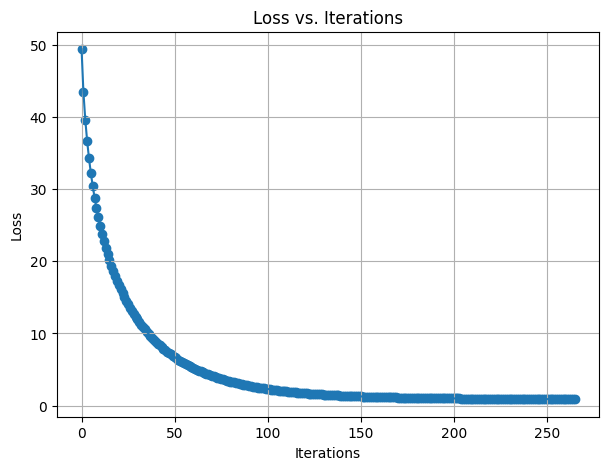

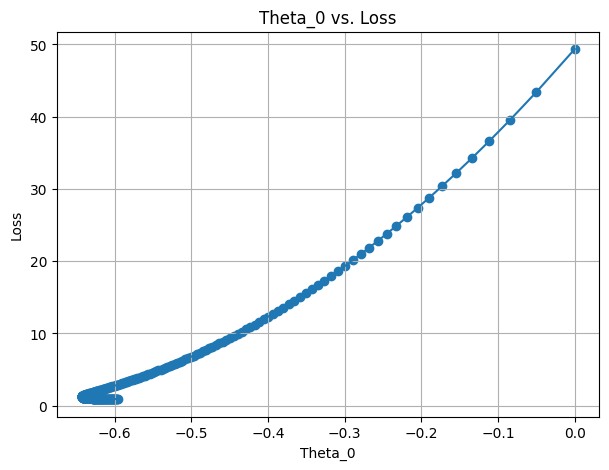

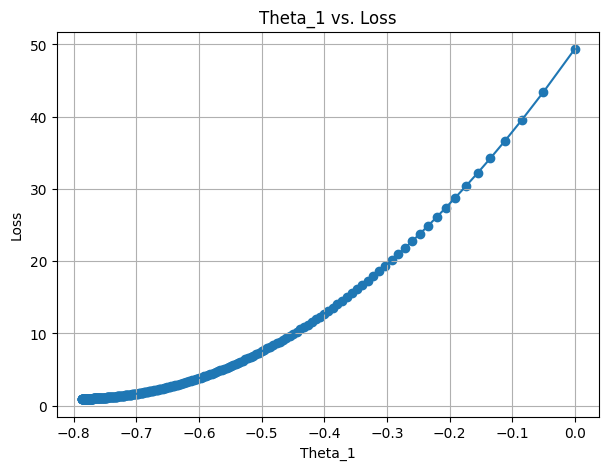

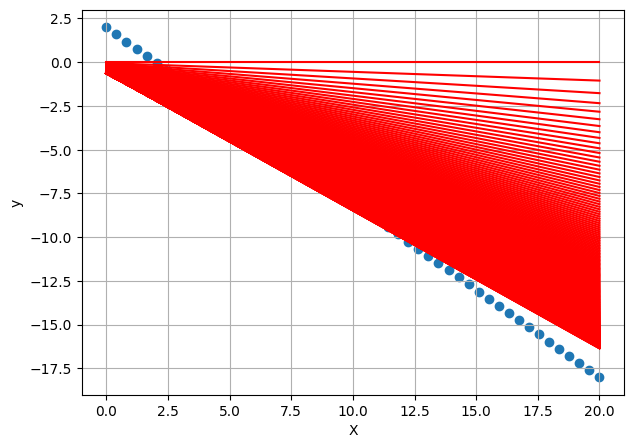

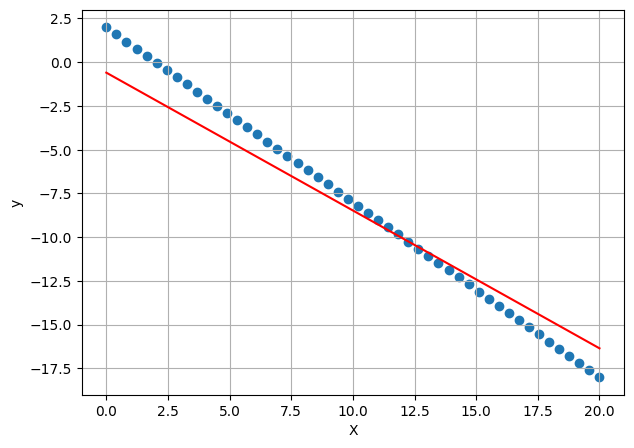

In [9]:
loss_vs_epochs(cost_valsag1)
theta0_vs_loss(theta_0_valsag1, cost_valsag1)
theta1_vs_loss(theta_1_valsag1, cost_valsag1)
plot_all_regressions(X, y, y_pred_valsag1)
plot_best_regression(X, y, y_predag1)

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [10]:
 y_predag2, cost_valsag2, theta_0_valsag2, theta_1_valsag2, theta_0ag2, theta_1ag2, y_pred_valsag2 = LR_ADAGRAD(X, y, learning_rate=0.005, max_iterations=5000)

Streaming output truncated to the last 5000 lines.
  -8.47247023  -8.69925312  -8.92603601  -9.1528189   -9.37960179
  -9.60638468  -9.83316757 -10.05995046 -10.28673335 -10.51351624
 -10.74029913 -10.96708202 -11.19386491 -11.4206478  -11.64743069]

Error Vector:
[-2.53506906e+00 -2.35368869e+00 -2.17230831e+00 -1.99092794e+00
 -1.80954756e+00 -1.62816719e+00 -1.44678681e+00 -1.26540644e+00
 -1.08402606e+00 -9.02645689e-01 -7.21265314e-01 -5.39884940e-01
 -3.58504565e-01 -1.77124190e-01  4.25618532e-03  1.85636560e-01
  3.67016935e-01  5.48397310e-01  7.29777685e-01  9.11158060e-01
  1.09253844e+00  1.27391881e+00  1.45529918e+00  1.63667956e+00
  1.81805993e+00  1.99944031e+00  2.18082068e+00  2.36220106e+00
  2.54358143e+00  2.72496181e+00  2.90634218e+00  3.08772256e+00
  3.26910293e+00  3.45048331e+00  3.63186368e+00  3.81324406e+00
  3.99462443e+00  4.17600481e+00  4.35738518e+00  4.53876556e+00
  4.72014593e+00  4.90152631e+00  5.08290668e+00  5.26428706e+00
  5.44566743e+00  5.

In [11]:
print(f"r2 score = {r2_score(y, y_predag2)}")

r2 score = 0.7095974929894115


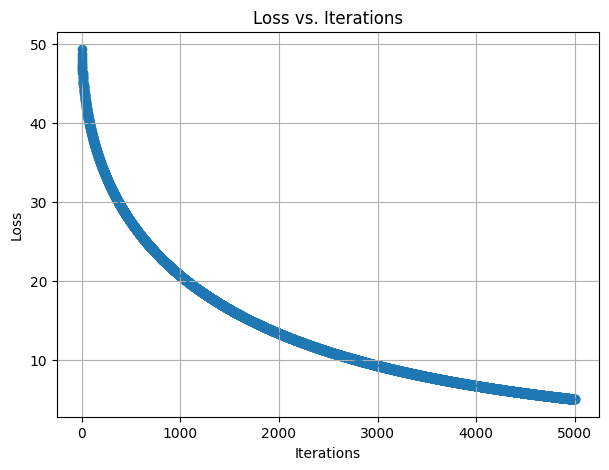

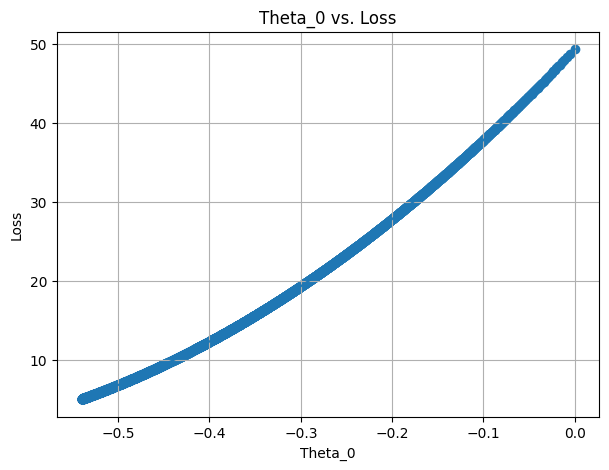

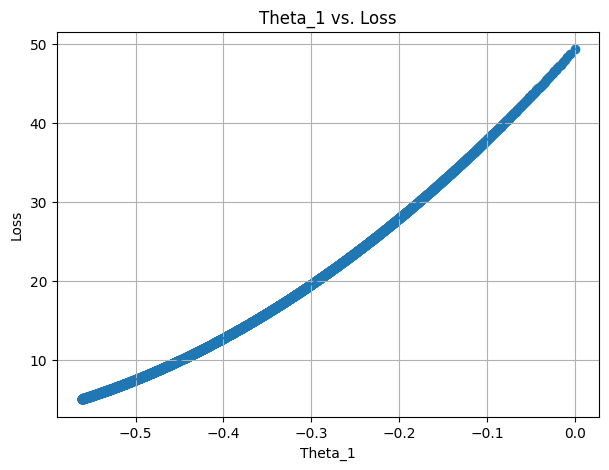

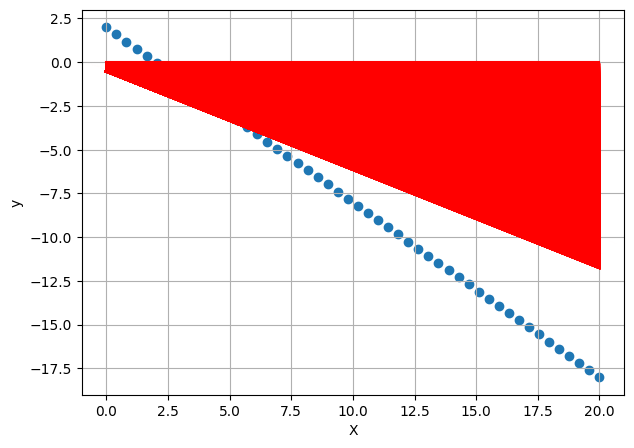

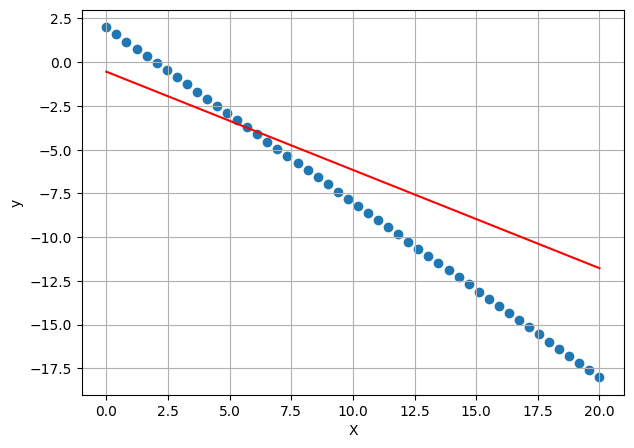

In [12]:
loss_vs_epochs(cost_valsag2)
theta0_vs_loss(theta_0_valsag2, cost_valsag2)
theta1_vs_loss(theta_1_valsag2, cost_valsag2)
plot_all_regressions(X, y, y_pred_valsag2)
plot_best_regression(X, y, y_predag2)

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [13]:
 y_predag3, cost_valsag3, theta_0_valsag3, theta_1_valsag3, theta_0ag3, theta_1ag3, y_pred_valsag3 = LR_ADAGRAD(X, y, learning_rate=0.0005, max_iterations=5000)

Streaming output truncated to the last 5000 lines.
[-0.05291475 -0.07453671 -0.09615866 -0.11778062 -0.13940257 -0.16102453
 -0.18264648 -0.20426844 -0.22589039 -0.24751235 -0.2691343  -0.29075625
 -0.31237821 -0.33400016 -0.35562212 -0.37724407 -0.39886603 -0.42048798
 -0.44210994 -0.46373189 -0.48535385 -0.5069758  -0.52859776 -0.55021971
 -0.57184167 -0.59346362 -0.61508558 -0.63670753 -0.65832948 -0.67995144
 -0.70157339 -0.72319535 -0.7448173  -0.76643926 -0.78806121 -0.80968317
 -0.83130512 -0.85292708 -0.87454903 -0.89617099 -0.91779294 -0.9394149
 -0.96103685 -0.9826588  -1.00428076 -1.02590271 -1.04752467 -1.06914662
 -1.09076858 -1.11239053]

Error Vector:
[-2.05291475 -1.66637344 -1.27983213 -0.89329082 -0.50674951 -0.1202082
  0.26633311  0.65287442  1.03941573  1.42595704  1.81249835  2.19903966
  2.58558097  2.97212228  3.3586636   3.74520491  4.13174622  4.51828753
  4.90482884  5.29137015  5.67791146  6.06445277  6.45099408  6.83753539
  7.2240767   7.61061801  7.997159

In [14]:
print(f"r2 score = {r2_score(y, y_predag3)}")

r2 score = -1.4736441832884104


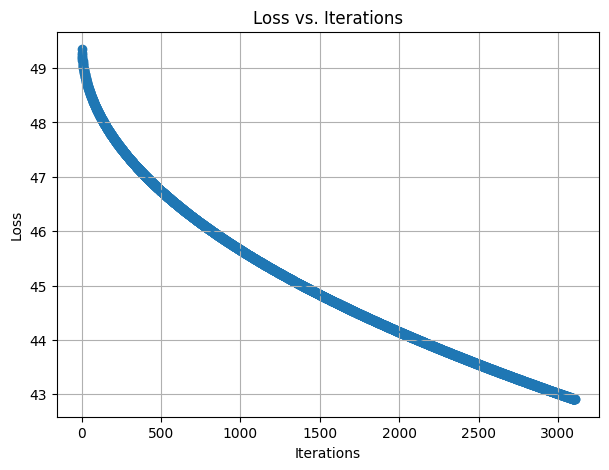

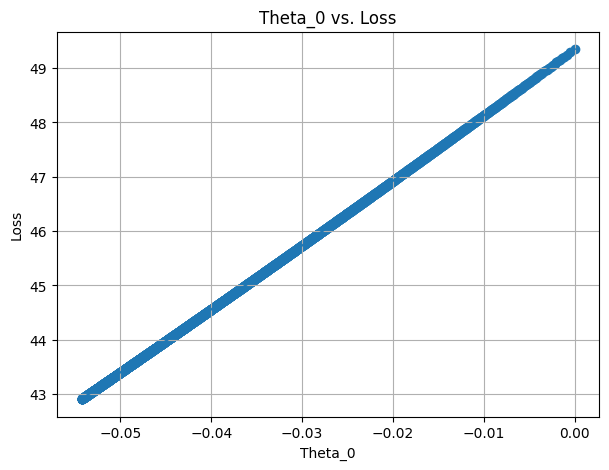

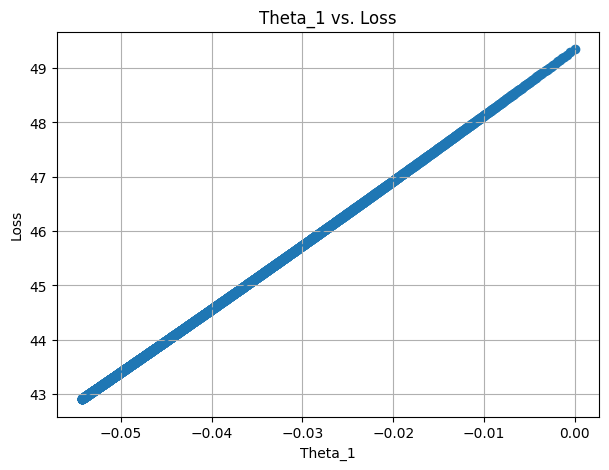

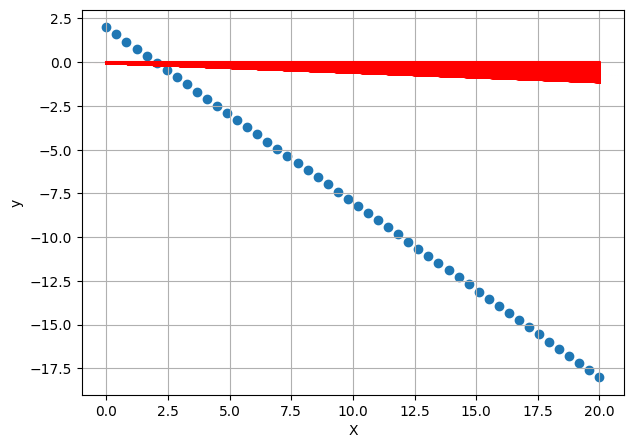

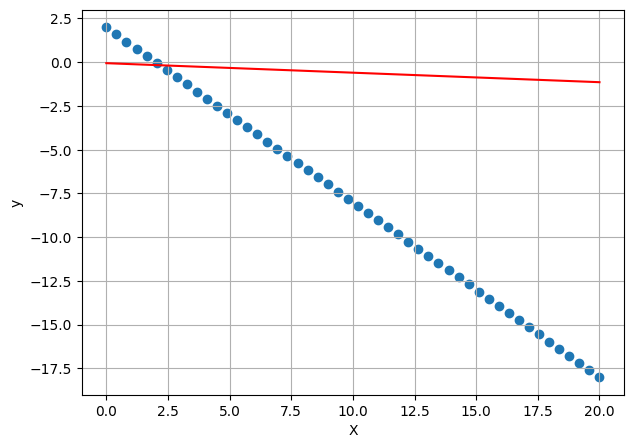

In [15]:
loss_vs_epochs(cost_valsag3)
theta0_vs_loss(theta_0_valsag3, cost_valsag3)
theta1_vs_loss(theta_1_valsag3, cost_valsag3)
plot_all_regressions(X, y, y_pred_valsag3)
plot_best_regression(X, y, y_predag3)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [16]:
def LR_RMS(X, y, learning_rate=0.001, max_iterations=1000, stop_criteria=0.001, cost_tolerance=0.001, epsilon = (10**-8), B = 0.9):
    theta_0 = 0
    theta_1 = 0
    m = len(y)
    v_0 = 0
    v_1 = 0

    theta_0_vals = []
    theta_1_vals = []
    cost_vals = []
    y_pred_vals = []

    for iteration in range(max_iterations):
        y_pred = theta_0 + theta_1 * X
        Error_Vector = y_pred - y

        cost = (1 / (2 * m)) * np.sum(Error_Vector ** 2)

        d_theta_0 = (1 / m) * np.sum(Error_Vector)
        d_theta_1 = (1 / m) * np.sum(Error_Vector * X)
        Gradient_Vector = np.array([d_theta_0, d_theta_1])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

        theta_0_vals.append(theta_0)
        theta_1_vals.append(theta_1)
        cost_vals.append(cost)
        y_pred_vals.append(y_pred)

        print(f"\n****************** Iteration {iteration} ********************\n")
        print(f"Predicted Values h(x):\n{y_pred}\n")
        print(f"Error Vector:\n{Error_Vector}\n")
        print(f"Cost (J): {cost:.6f}\n")
        print(f"Gradient Vector:\n{Gradient_Vector}\n")
        print(f"Gradient Vector Norm: {Gradient_Vector_Norm:.6f}\n")

        if iteration > 0:
            if (abs(cost_vals[-1] - cost_vals[-2]) < cost_tolerance) or ((Gradient_Vector_Norm < stop_criteria)):

                print("****************** Training Report ********************\n")
                print(f"Gradient Descent converged after {iteration+1} epochs\n")
                print(f"theta_0_Opt : {theta_0}")
                print(f"theta_1_Opt : {theta_1}\n")
                print(f"Error Vector:\n {Error_Vector}")
                print("\nCost =", cost, "\n")
                print(f"\nh(x) = y_predict: \n {y_pred}")
                print(f"\ny_actual : \n {y}\n")

                break

        v_0 = B * v_0 + (1-B) * (d_theta_0**2)
        v_1 = B * v_1 + (1-B) * (d_theta_1**2)

        theta_0 -= learning_rate / (np.sqrt(v_0) + epsilon) * d_theta_0
        theta_1 -= learning_rate / (np.sqrt(v_1) + epsilon) * d_theta_1

    return y_pred, cost_vals, theta_0_vals, theta_1_vals, theta_0, theta_1, y_pred_vals

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [17]:
 y_predrms1, cost_valsarms1, theta_0_valsrms1, theta_1_valsrms1, theta_0rms1, theta_1rms1, y_pred_valsrms1 = LR_RMS(X, y, learning_rate=0.05, max_iterations=500, B=0.9)


****************** Iteration 0 ********************

Predicted Values h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost (J): 49.346939

Gradient Vector:
[  8.         114.69387755]

Gradient Vector Norm: 114.972543


****************** Iteration 1 ***********

In [18]:
print(f"r2 score = {r2_score(y, y_predrms1)}")

r2 score = 0.9993602095484933


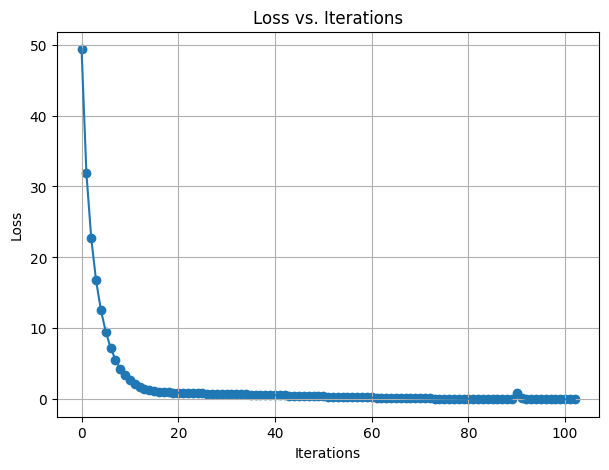

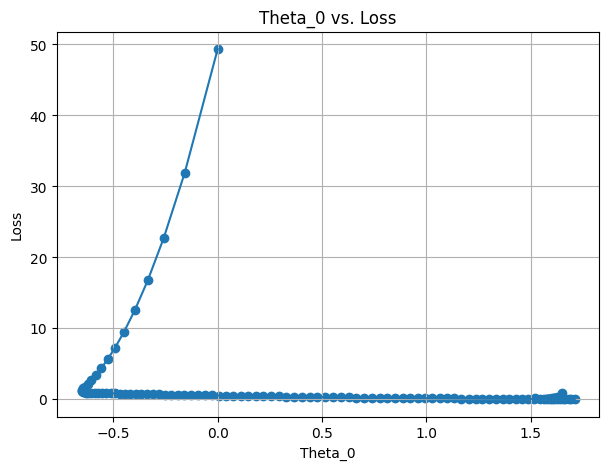

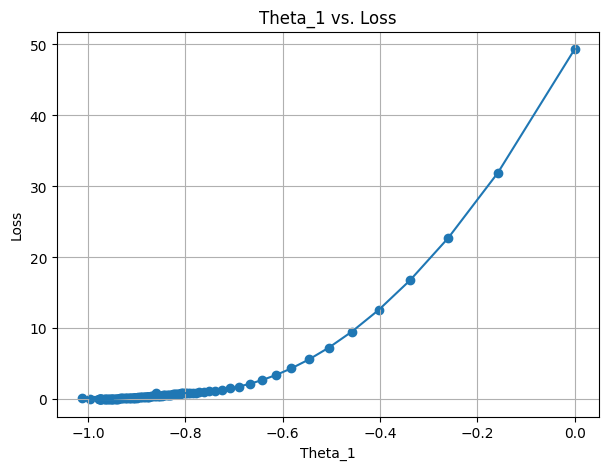

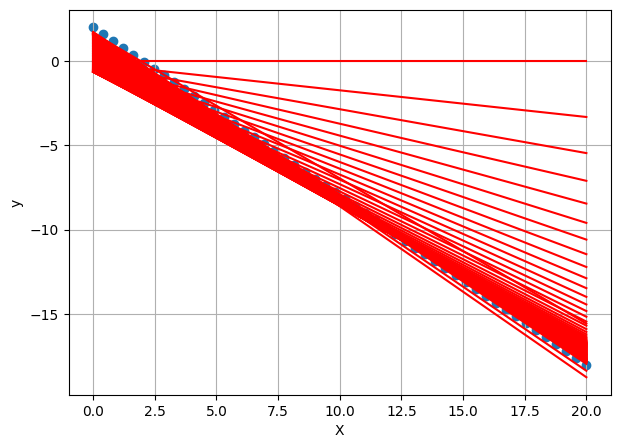

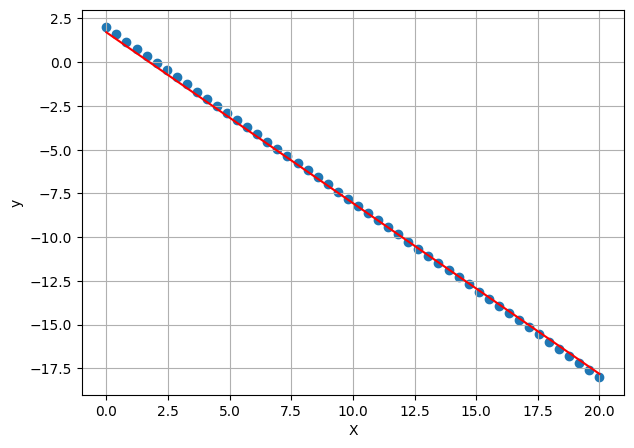

In [19]:
loss_vs_epochs(cost_valsarms1)
theta0_vs_loss(theta_0_valsrms1, cost_valsarms1)
theta1_vs_loss(theta_1_valsrms1, cost_valsarms1)
plot_all_regressions(X, y, y_pred_valsrms1)
plot_best_regression(X, y, y_predrms1)

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [20]:
 y_predrms2, cost_valsarms2, theta_0_valsrms2, theta_1_valsrms2, theta_0rms2, theta_1rms2, y_pred_valsrms2 = LR_RMS(X, y, learning_rate=0.005, max_iterations=5000, B=0.9)

Streaming output truncated to the last 5000 lines.
[  0.46936698   0.10868714  -0.25199271  -0.61267256  -0.97335241
  -1.33403226  -1.6947121   -2.05539195  -2.4160718   -2.77675165
  -3.1374315   -3.49811135  -3.85879119  -4.21947104  -4.58015089
  -4.94083074  -5.30151059  -5.66219044  -6.02287028  -6.38355013
  -6.74422998  -7.10490983  -7.46558968  -7.82626952  -8.18694937
  -8.54762922  -8.90830907  -9.26898892  -9.62966877  -9.99034861
 -10.35102846 -10.71170831 -11.07238816 -11.43306801 -11.79374785
 -12.1544277  -12.51510755 -12.8757874  -13.23646725 -13.5971471
 -13.95782694 -14.31850679 -14.67918664 -15.03986649 -15.40054634
 -15.76122618 -16.12190603 -16.48258588 -16.84326573 -17.20394558]

Error Vector:
[-1.53063302 -1.4831496  -1.43566618 -1.38818276 -1.34069935 -1.29321593
 -1.24573251 -1.1982491  -1.15076568 -1.10328226 -1.05579884 -1.00831543
 -0.96083201 -0.91334859 -0.86586518 -0.81838176 -0.77089834 -0.72341492
 -0.67593151 -0.62844809 -0.58096467 -0.53348126 -0.485

In [21]:
print(f"r2 score = {r2_score(y, y_predrms2)}")

r2 score = 0.9948527107478715


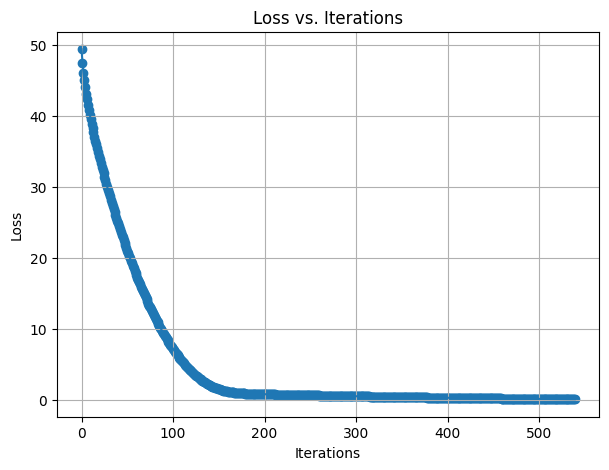

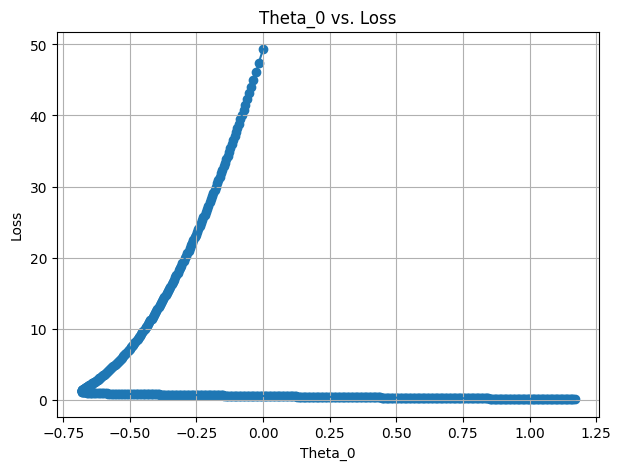

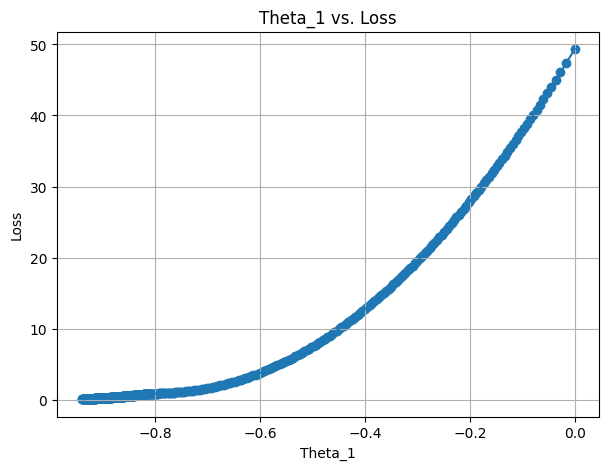

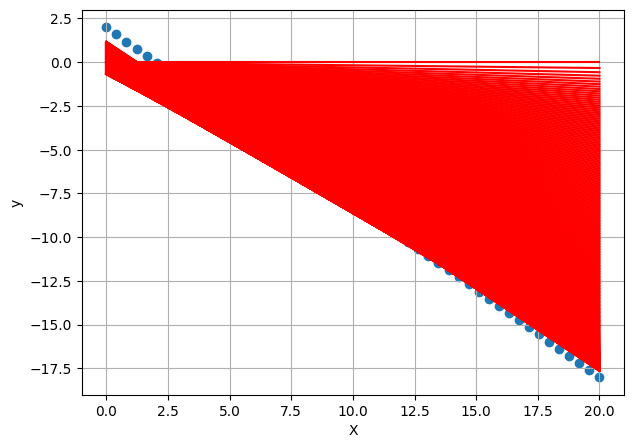

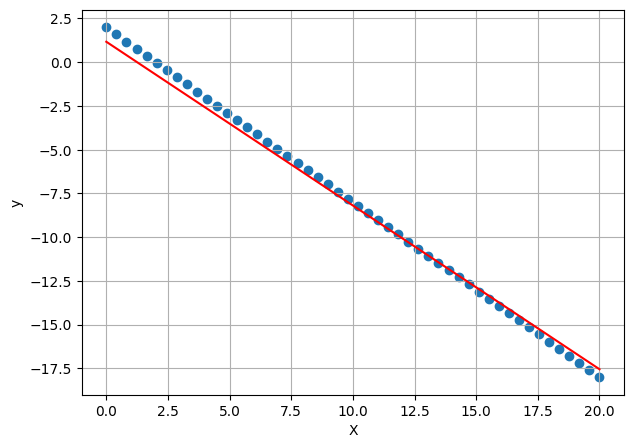

In [22]:
loss_vs_epochs(cost_valsarms2)
theta0_vs_loss(theta_0_valsrms2, cost_valsarms2)
theta1_vs_loss(theta_1_valsrms2, cost_valsarms2)
plot_all_regressions(X, y, y_pred_valsrms2)
plot_best_regression(X, y, y_predrms2)

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [23]:
 y_predrms3, cost_valsarms3, theta_0_valsrms3, theta_1_valsrms3, theta_0rms3, theta_1rms3, y_pred_valsrms3 = LR_RMS(X, y, learning_rate=0.0005, max_iterations=5000, B=0.9)

Streaming output truncated to the last 5000 lines.
 -0.68450986 -0.57177034 -0.45903082 -0.3462913  -0.23355178 -0.12081226
 -0.00807273  0.10466679  0.21740631  0.33014583  0.44288535  0.55562487
  0.6683644   0.78110392  0.89384344  1.00658296  1.11932248  1.232062
  1.34480152  1.45754105  1.57028057  1.68302009  1.79575961  1.90849913
  2.02123865  2.13397818  2.2467177   2.35945722  2.47219674  2.58493626
  2.69767578  2.8104153 ]

Cost (J): 1.324616

Gradient Vector:
[ 0.04829703 10.0658296 ]

Gradient Vector Norm: 10.065945


****************** Iteration 1461 ********************

Predicted Values h(x):
[ -0.71405057  -1.00966656  -1.30528255  -1.60089854  -1.89651454
  -2.19213053  -2.48774652  -2.78336251  -3.07897851  -3.3745945
  -3.67021049  -3.96582648  -4.26144247  -4.55705847  -4.85267446
  -5.14829045  -5.44390644  -5.73952243  -6.03513843  -6.33075442
  -6.62637041  -6.9219864   -7.2176024   -7.51321839  -7.80883438
  -8.10445037  -8.40006636  -8.69568236  -8.99129835 

In [24]:
print(f"r2 score = {r2_score(y, y_predrms3)}")

r2 score = 0.9476184845511563


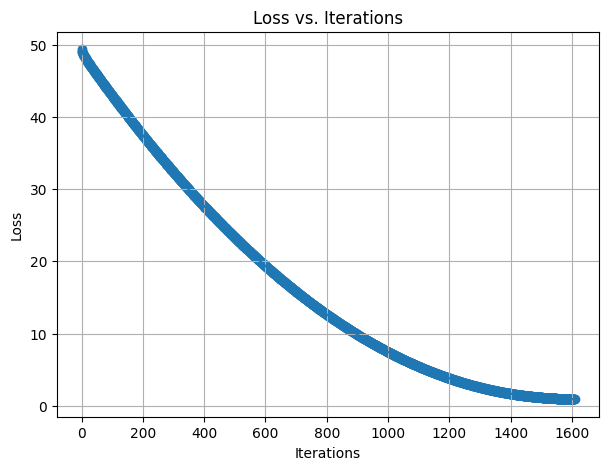

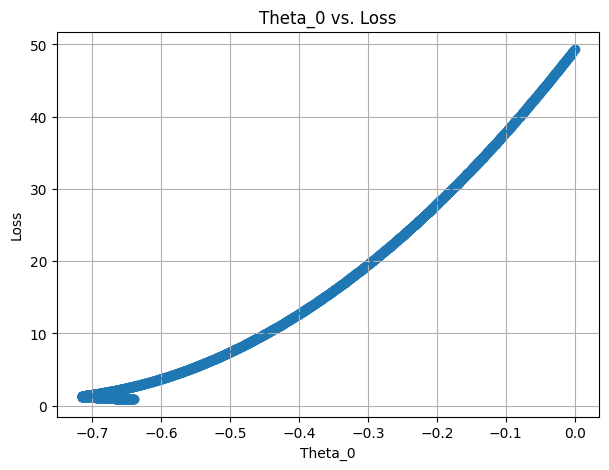

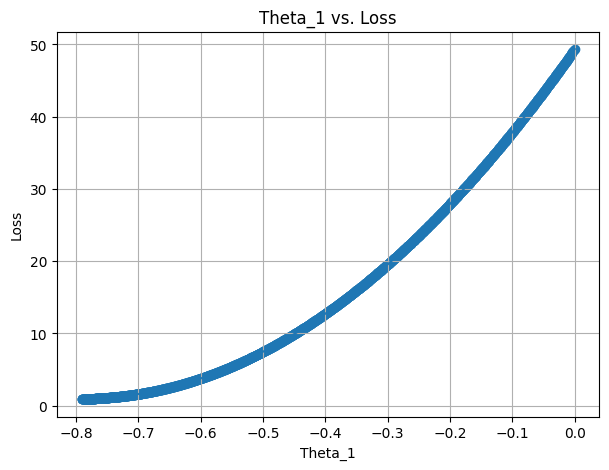

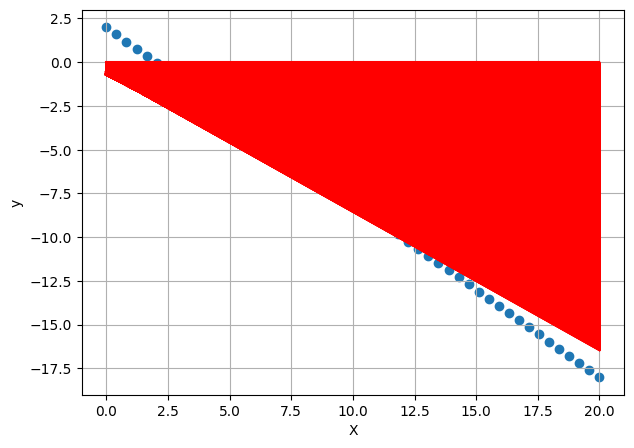

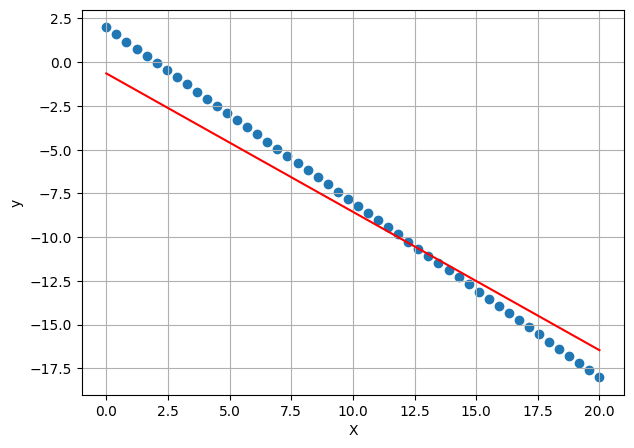

In [25]:
loss_vs_epochs(cost_valsarms3)
theta0_vs_loss(theta_0_valsrms3, cost_valsarms3)
theta1_vs_loss(theta_1_valsrms3, cost_valsarms3)
plot_all_regressions(X, y, y_pred_valsrms3)
plot_best_regression(X, y, y_predrms3)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [26]:
def LR_ADAM(X, y, learning_rate=0.001, max_iterations=1000, stop_criteria=0.001, cost_tolerance=0.001, epsilon = (10**-8), B1 = 0.9, B2 = 0.9):
    theta_0 = 0
    theta_1 = 0
    m = len(y)
    m_0 = 0
    m_1 = 0
    v_0 = 0
    v_1 = 0

    theta_0_vals = []
    theta_1_vals = []
    cost_vals = []
    y_pred_vals = []

    for i in range(max_iterations):
        y_pred = theta_0 + theta_1 * X
        Error_Vector = y_pred - y

        cost = (1 / (2 * m)) * np.sum(Error_Vector ** 2)

        d_theta_0 = (1 / m) * np.sum(Error_Vector)
        d_theta_1 = (1 / m) * np.sum(Error_Vector * X)
        Gradient_Vector = np.array([d_theta_0, d_theta_1])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

        theta_0_vals.append(theta_0)
        theta_1_vals.append(theta_1)
        cost_vals.append(cost)
        y_pred_vals.append(y_pred)

        print(f"\n****************** Iteration {i} ********************\n")
        print(f"Predicted Values h(x):\n{y_pred}\n")
        print(f"Error Vector:\n{Error_Vector}\n")
        print(f"Cost (J): {cost:.6f}\n")
        print(f"Gradient Vector:\n{Gradient_Vector}\n")
        print(f"Gradient Vector Norm: {Gradient_Vector_Norm:.6f}\n")

        if i > 0:
            if (abs(cost_vals[-1] - cost_vals[-2]) < cost_tolerance) or ((Gradient_Vector_Norm < stop_criteria)):

                print("****************** Training Report ********************\n")
                print(f"Gradient Descent converged after {i+1} epochs\n")
                print(f"theta_0_Opt : {theta_0}")
                print(f"theta_1_Opt : {theta_1}\n")
                print(f"Error Vector:\n {Error_Vector}")
                print("\nCost =", cost, "\n")
                print(f"\nh(x) = y_predict: \n {y_pred}")
                print(f"\ny_actual : \n {y}\n")

                break

        m_0 = B1 * m_0 + (1-B1) * d_theta_0
        m_1 = B1 * m_1 + (1-B1) * d_theta_1

        m_0_hat = m_0 / (1-B1**(i+1))
        m_1_hat = m_1 / (1-B1**(i+1))

        v_0 = B2 * v_0 + (1-B2) * (d_theta_0**2)
        v_1 = B2 * v_1 + (1-B2) * (d_theta_1**2)

        v_0_hat = v_0 / (1-B2**(i+1))
        v_1_hat = v_1 / (1-B2**(i+1))

        theta_0 -= learning_rate / (np.sqrt(v_0_hat) + epsilon) * m_0_hat
        theta_1 -= learning_rate / (np.sqrt(v_1_hat) + epsilon) * m_1_hat




    return y_pred, cost_vals, theta_0_vals, theta_1_vals, theta_0, theta_1, y_pred_vals

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [27]:
 y_predadam1, cost_valsadam1, theta_0_valsadam1, theta_1_valsadam1, theta_0adam1, theta_1adam1, y_pred_valsadam1 = LR_ADAM(X, y, learning_rate=0.05, max_iterations=500, B1=0.2, B2=0.7)


****************** Iteration 0 ********************

Predicted Values h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost (J): 49.346939

Gradient Vector:
[  8.         114.69387755]

Gradient Vector Norm: 114.972543


****************** Iteration 1 ***********

In [28]:
print(f"r2 score = {r2_score(y, y_predadam1)}")

r2 score = 0.9989675218213928


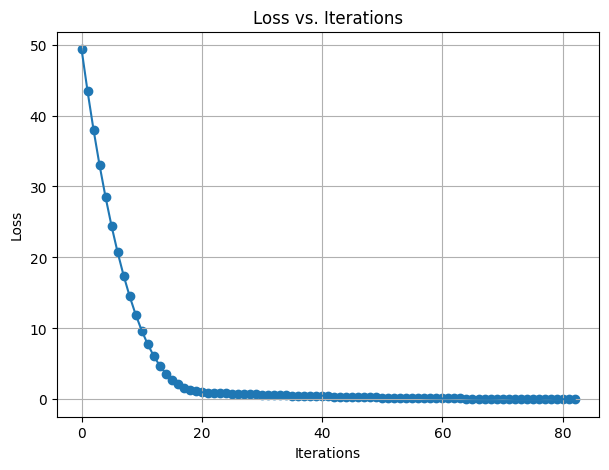

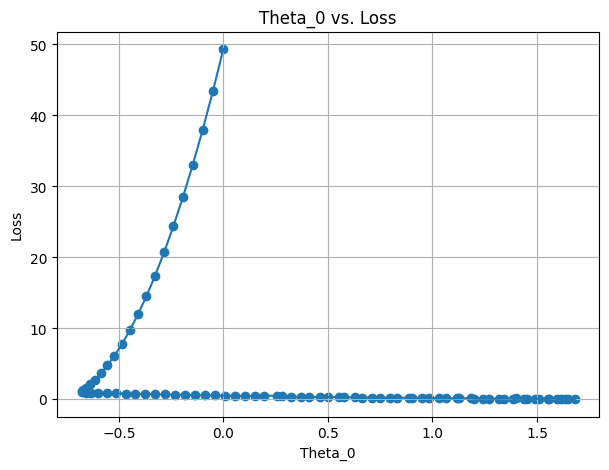

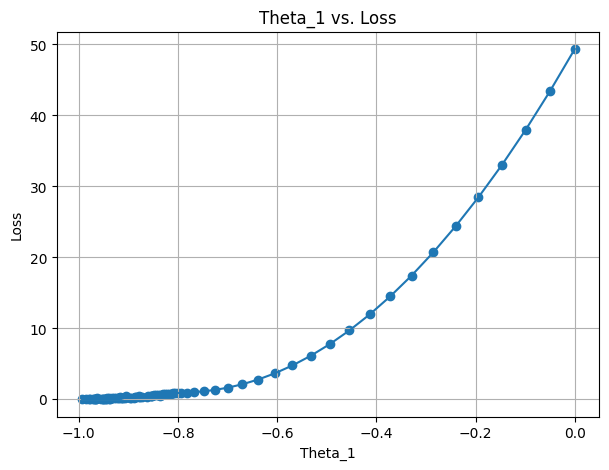

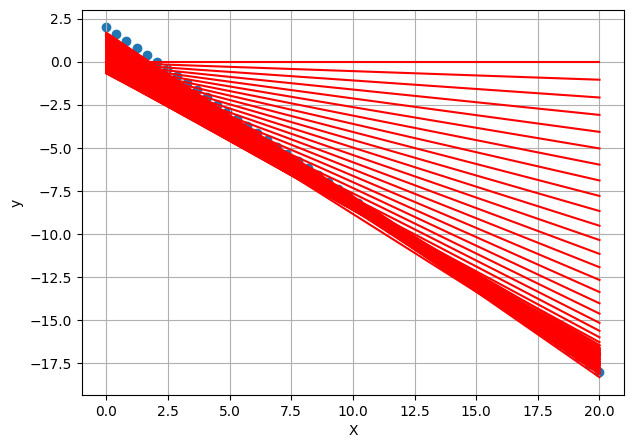

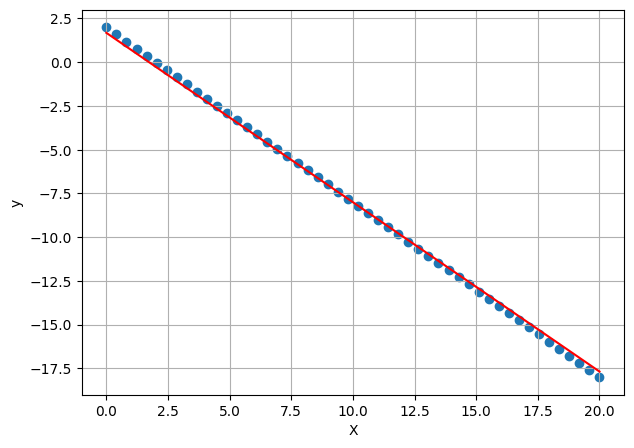

In [29]:
loss_vs_epochs(cost_valsadam1)
theta0_vs_loss(theta_0_valsadam1, cost_valsadam1)
theta1_vs_loss(theta_1_valsadam1, cost_valsadam1)
plot_all_regressions(X, y, y_pred_valsadam1)
plot_best_regression(X, y, y_predadam1)

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [30]:
y_predadam2, cost_valsadam2, theta_0_valsadam2, theta_1_valsadam2, theta_0adam2, theta_1adam2, y_pred_valsadam2 = LR_ADAM(X, y, learning_rate=0.005, max_iterations=500, B1=0.5, B2=0.8)

Streaming output truncated to the last 5000 lines.
  0.14728651  0.19950926  0.251732    0.30395474  0.35617748  0.40840022
  0.46062297  0.51284571  0.56506845  0.61729119  0.66951393  0.72173668
  0.77395942  0.82618216]

Cost (J): 0.386700

Gradient Vector:
[-0.45327502 -0.09381713]

Gradient Vector Norm: 0.462882


****************** Iteration 351 ********************

Predicted Values h(x):
[  0.27224448  -0.08315021  -0.4385449   -0.79393959  -1.14933429
  -1.50472898  -1.86012367  -2.21551836  -2.57091305  -2.92630774
  -3.28170244  -3.63709713  -3.99249182  -4.34788651  -4.7032812
  -5.05867589  -5.41407059  -5.76946528  -6.12485997  -6.48025466
  -6.83564935  -7.19104404  -7.54643874  -7.90183343  -8.25722812
  -8.61262281  -8.9680175   -9.32341219  -9.67880689 -10.03420158
 -10.38959627 -10.74499096 -11.10038565 -11.45578034 -11.81117504
 -12.16656973 -12.52196442 -12.87735911 -13.2327538  -13.58814849
 -13.94354319 -14.29893788 -14.65433257 -15.00972726 -15.36512195
 -15.720

In [31]:
print(f"r2 score = {r2_score(y, y_predadam2)}")

r2 score = 0.992630779461015


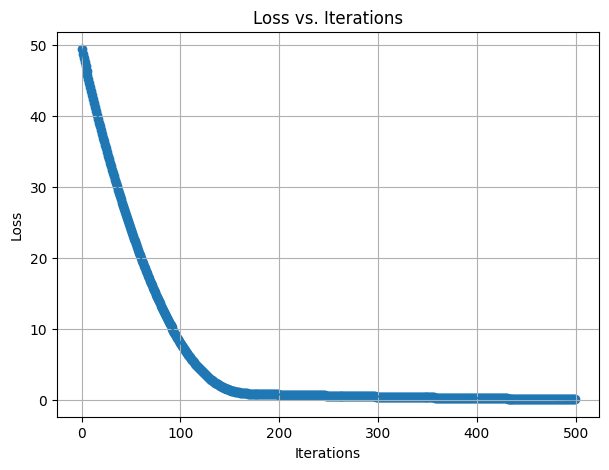

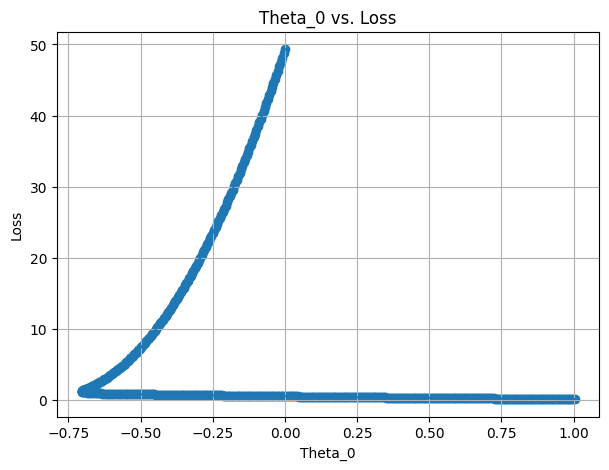

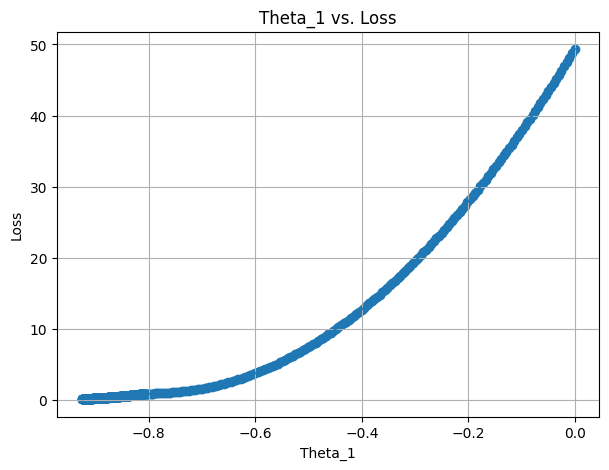

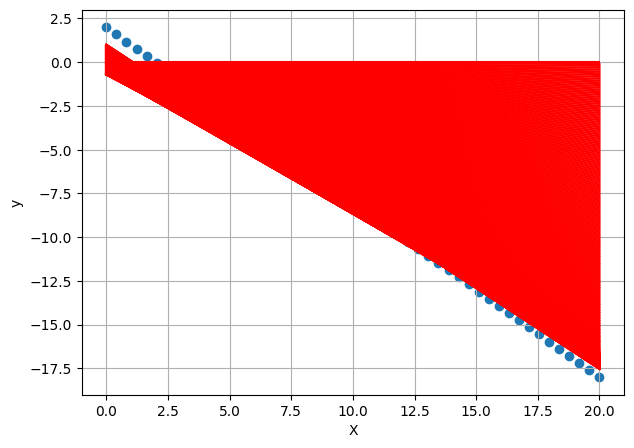

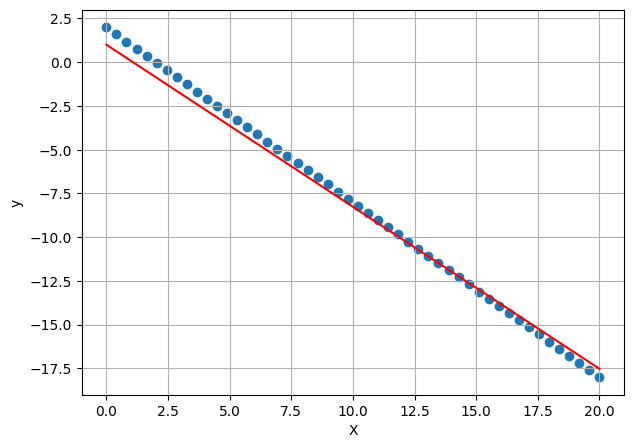

In [32]:
loss_vs_epochs(cost_valsadam2)
theta0_vs_loss(theta_0_valsadam2, cost_valsadam2)
theta1_vs_loss(theta_1_valsadam2, cost_valsadam2)
plot_all_regressions(X, y, y_pred_valsadam2)
plot_best_regression(X, y, y_predadam2)

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [33]:
y_predadam3, cost_valsadam3, theta_0_valsadam3, theta_1_valsadam3, theta_0adam3, theta_1adam3, y_pred_valsadam3 = LR_ADAM(X, y, learning_rate=0.0005, max_iterations=5000, B1=0.8, B2=0.8)

Streaming output truncated to the last 5000 lines.
Gradient Vector Norm: 10.882494


****************** Iteration 1436 ********************

Predicted Values h(x):
[ -0.7177894   -1.01083867  -1.30388793  -1.5969372   -1.88998646
  -2.18303573  -2.476085    -2.76913426  -3.06218353  -3.35523279
  -3.64828206  -3.94133132  -4.23438059  -4.52742985  -4.82047912
  -5.11352838  -5.40657765  -5.69962691  -5.99267618  -6.28572544
  -6.57877471  -6.87182397  -7.16487324  -7.4579225   -7.75097177
  -8.04402103  -8.3370703   -8.63011956  -8.92316883  -9.2162181
  -9.50926736  -9.80231663 -10.09536589 -10.38841516 -10.68146442
 -10.97451369 -11.26756295 -11.56061222 -11.85366148 -12.14671075
 -12.43976001 -12.73280928 -13.02585854 -13.31890781 -13.61195707
 -13.90500634 -14.1980556  -14.49110487 -14.78415413 -15.0772034 ]

Error Vector:
[-2.7177894 -2.6026754 -2.4875614 -2.3724474 -2.2573334 -2.1422194
 -2.0271054 -1.9119914 -1.7968774 -1.6817634 -1.5666494 -1.4515354
 -1.3364214 -1.2213074 -1.1

In [34]:
print(f"r2 score = {r2_score(y, y_predadam3)}")

r2 score = 0.9467806664066584


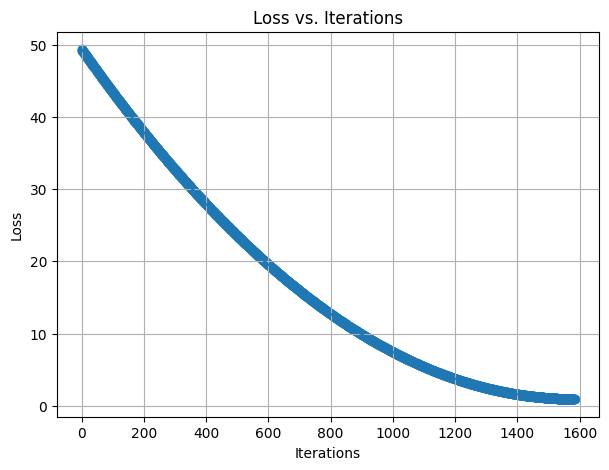

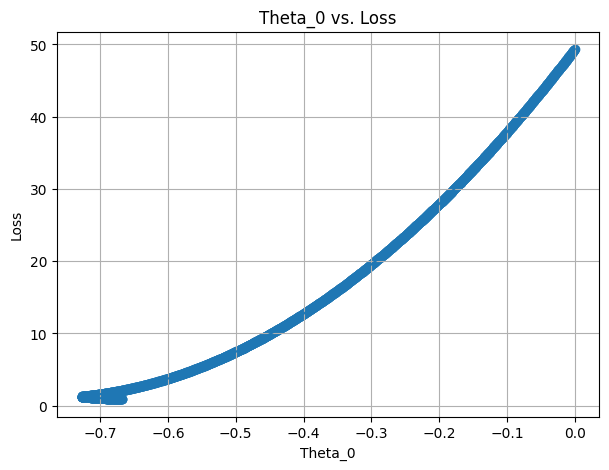

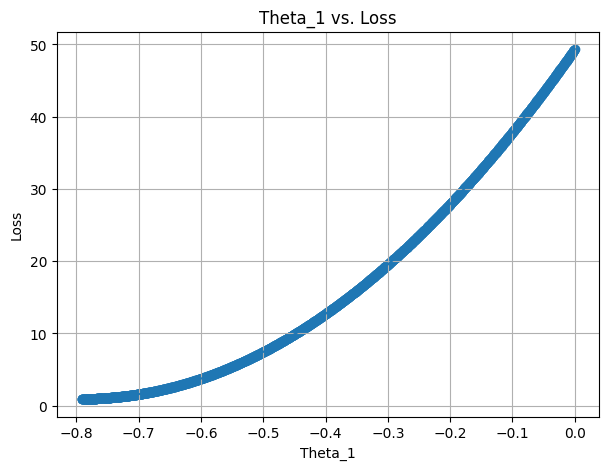

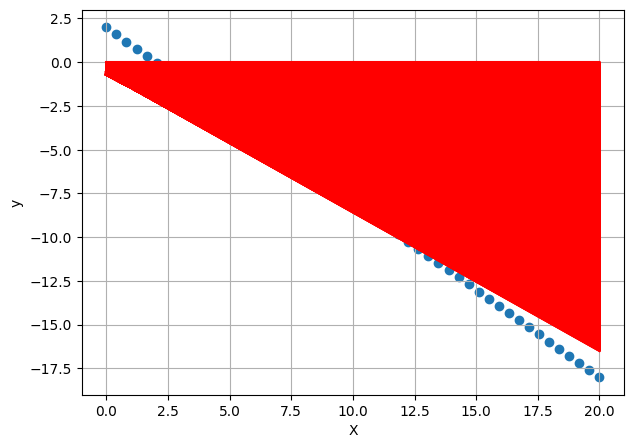

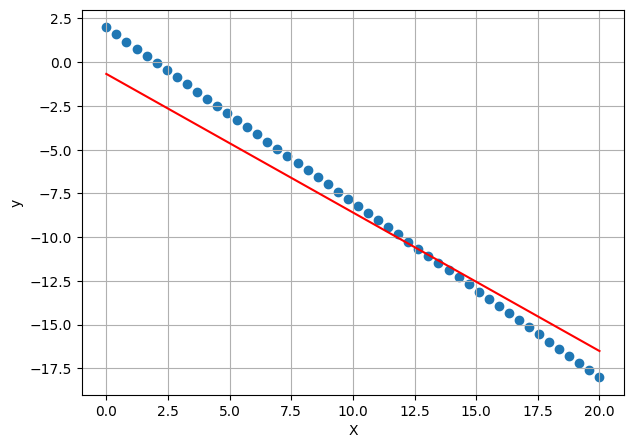

In [35]:
loss_vs_epochs(cost_valsadam3)
theta0_vs_loss(theta_0_valsadam3, cost_valsadam3)
theta1_vs_loss(theta_1_valsadam3, cost_valsadam3)
plot_all_regressions(X, y, y_pred_valsadam3)
plot_best_regression(X, y, y_predadam3)

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [36]:
y_predadam4, cost_valsadam4, theta_0_valsadam4, theta_1_valsadam4, theta_0adam4, theta_1adam4, y_pred_valsadam4 = LR_ADAM(X, y, learning_rate=0.001, max_iterations=5000, B1=0.9, B2=0.99)

Streaming output truncated to the last 5000 lines.

Predicted Values h(x):
[ -0.66834157  -0.96870212  -1.26906267  -1.56942323  -1.86978378
  -2.17014433  -2.47050488  -2.77086544  -3.07122599  -3.37158654
  -3.6719471   -3.97230765  -4.2726682   -4.57302875  -4.87338931
  -5.17374986  -5.47411041  -5.77447096  -6.07483152  -6.37519207
  -6.67555262  -6.97591317  -7.27627373  -7.57663428  -7.87699483
  -8.17735539  -8.47771594  -8.77807649  -9.07843704  -9.3787976
  -9.67915815  -9.9795187  -10.27987925 -10.58023981 -10.88060036
 -11.18096091 -11.48132146 -11.78168202 -12.08204257 -12.38240312
 -12.68276368 -12.98312423 -13.28348478 -13.58384533 -13.88420589
 -14.18456644 -14.48492699 -14.78528754 -15.0856481  -15.38600865]

Error Vector:
[-2.66834157 -2.56053886 -2.45273614 -2.34493343 -2.23713072 -2.12932801
 -2.02152529 -1.91372258 -1.80591987 -1.69811715 -1.59031444 -1.48251173
 -1.37470902 -1.2669063  -1.15910359 -1.05130088 -0.94349817 -0.83569545
 -0.72789274 -0.62009003 -0.512

In [37]:
print(f"r2 score = {r2_score(y, y_predadam4)}")

r2 score = 0.9485667803280174


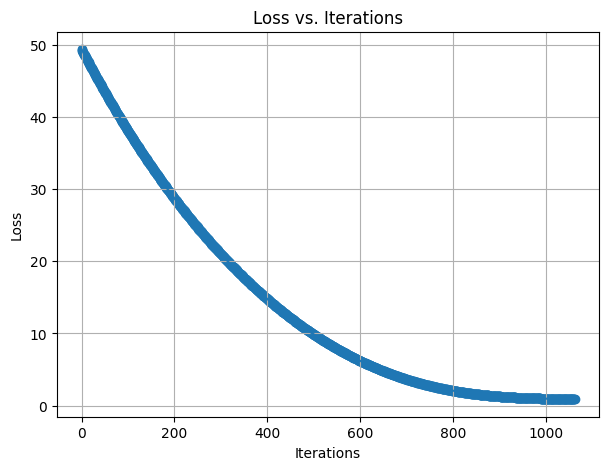

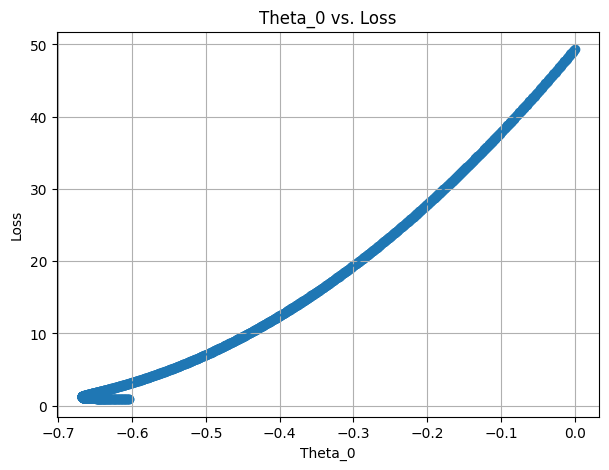

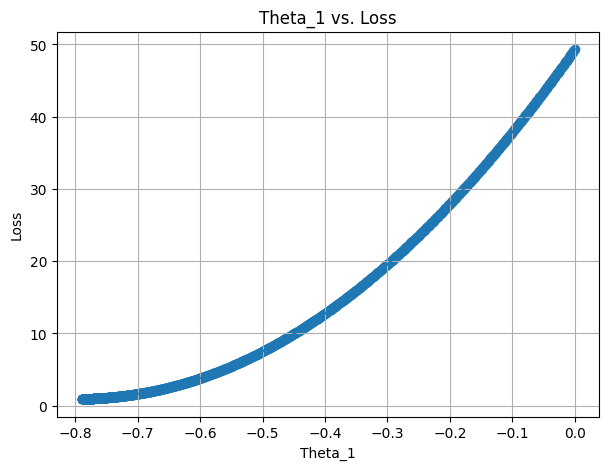

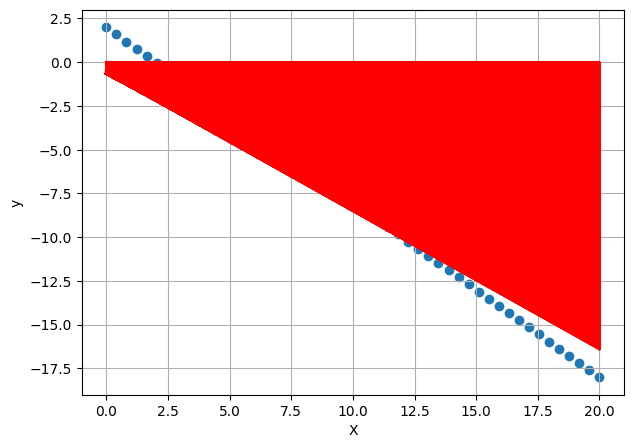

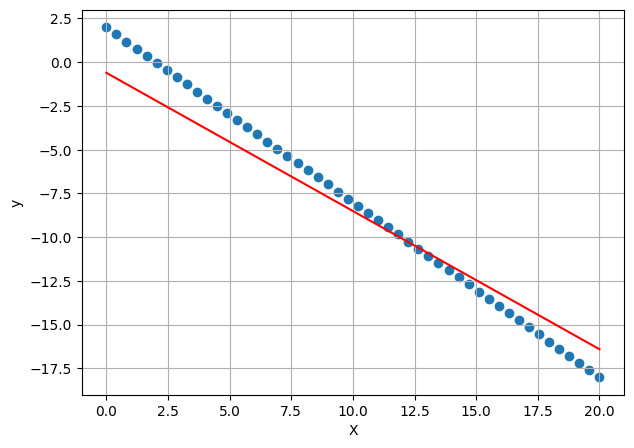

In [38]:
loss_vs_epochs(cost_valsadam4)
theta0_vs_loss(theta_0_valsadam4, cost_valsadam4)
theta1_vs_loss(theta_1_valsadam4, cost_valsadam4)
plot_all_regressions(X, y, y_pred_valsadam4)
plot_best_regression(X, y, y_predadam4)

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [39]:
y_predadam5, cost_valsadam5, theta_0_valsadam5, theta_1_valsadam5, theta_0adam5, theta_1adam5, y_pred_valsadam5 = LR_ADAM(X, y, learning_rate=0.001, max_iterations=5000, B1=0.9, B2=0.5)

Streaming output truncated to the last 5000 lines.

Gradient Vector Norm: 24.683924


****************** Iteration 611 ********************

Predicted Values h(x):
[ -0.62624196  -0.88056501  -1.13488805  -1.3892111   -1.64353414
  -1.89785719  -2.15218023  -2.40650328  -2.66082632  -2.91514937
  -3.16947241  -3.42379546  -3.6781185   -3.93244155  -4.18676459
  -4.44108764  -4.69541068  -4.94973373  -5.20405677  -5.45837982
  -5.71270286  -5.96702591  -6.22134895  -6.475672    -6.72999504
  -6.98431809  -7.23864113  -7.49296418  -7.74728722  -8.00161027
  -8.25593331  -8.51025636  -8.7645794   -9.01890245  -9.27322549
  -9.52754854  -9.78187158 -10.03619463 -10.29051767 -10.54484072
 -10.79916376 -11.05348681 -11.30780985 -11.5621329  -11.81645594
 -12.07077899 -12.32510203 -12.57942507 -12.83374812 -13.08807116]

Error Vector:
[-2.62624196 -2.47240174 -2.31856152 -2.1647213  -2.01088108 -1.85704086
 -1.70320064 -1.54936042 -1.3955202  -1.24167998 -1.08783976 -0.93399954
 -0.78015932 -

In [40]:
print(f"r2 score = {r2_score(y, y_predadam5)}")

r2 score = 0.944245878919177


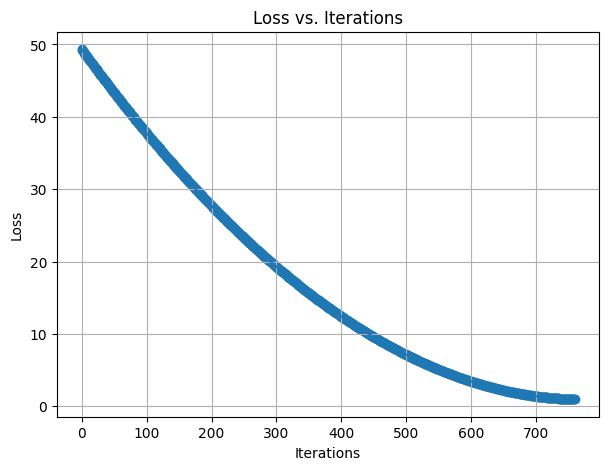

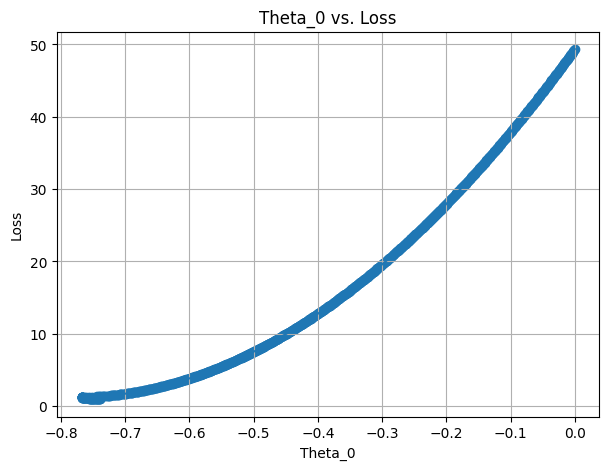

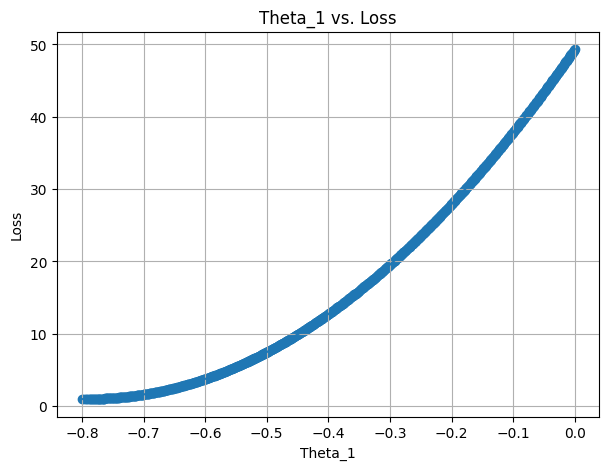

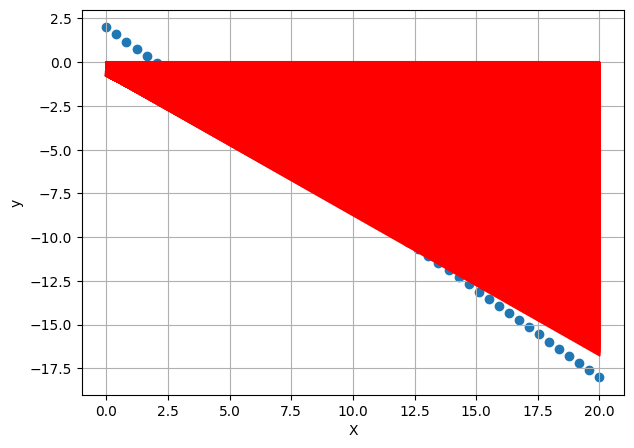

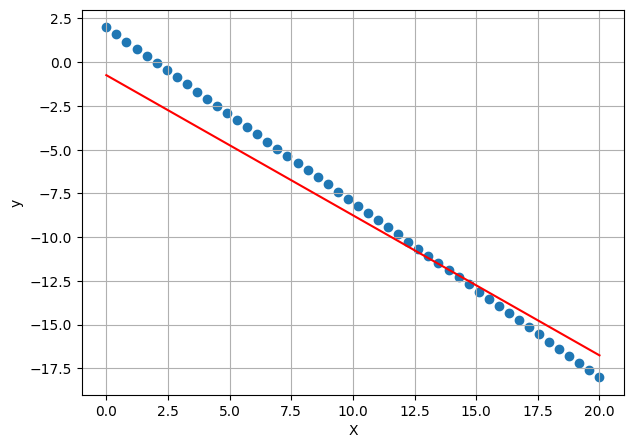

In [41]:
loss_vs_epochs(cost_valsadam5)
theta0_vs_loss(theta_0_valsadam5, cost_valsadam5)
theta1_vs_loss(theta_1_valsadam5, cost_valsadam5)
plot_all_regressions(X, y, y_pred_valsadam5)
plot_best_regression(X, y, y_predadam5)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [42]:
y_predadam6, cost_valsadam6, theta_0_valsadam6, theta_1_valsadam6, theta_0adam6, theta_1adam6, y_pred_valsadam6 = LR_ADAM(X, y, learning_rate=0.001, max_iterations=5000, B1=0.5, B2=0.99)

Streaming output truncated to the last 5000 lines.

Gradient Vector:
[-0.06627658  8.34415204]

Gradient Vector Norm: 8.344415


****************** Iteration 942 ********************

Predicted Values h(x):
[ -0.66231697  -0.96470119  -1.26708541  -1.56946963  -1.87185384
  -2.17423806  -2.47662228  -2.7790065   -3.08139072  -3.38377493
  -3.68615915  -3.98854337  -4.29092759  -4.5933118   -4.89569602
  -5.19808024  -5.50046446  -5.80284867  -6.10523289  -6.40761711
  -6.71000133  -7.01238554  -7.31476976  -7.61715398  -7.9195382
  -8.22192241  -8.52430663  -8.82669085  -9.12907507  -9.43145928
  -9.7338435  -10.03622772 -10.33861194 -10.64099616 -10.94338037
 -11.24576459 -11.54814881 -11.85053303 -12.15291724 -12.45530146
 -12.75768568 -13.0600699  -13.36245411 -13.66483833 -13.96722255
 -14.26960677 -14.57199098 -14.8743752  -15.17675942 -15.47914364]

Error Vector:
[-2.66231697 -2.55653793 -2.45075888 -2.34497983 -2.23920078 -2.13342174
 -2.02764269 -1.92186364 -1.81608459 -1.71030

In [43]:
print(f"r2 score = {r2_score(y, y_predadam6)}")

r2 score = 0.949344733641701


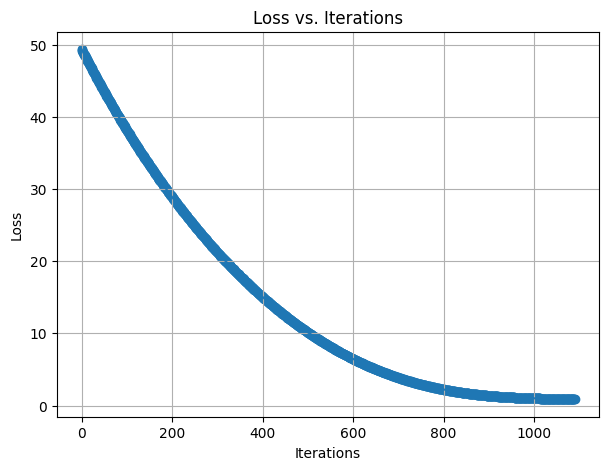

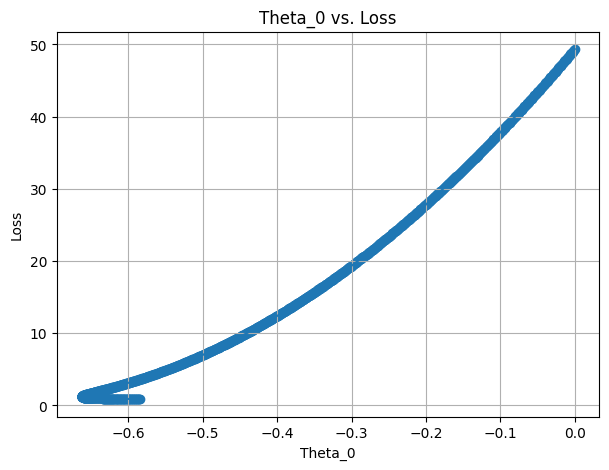

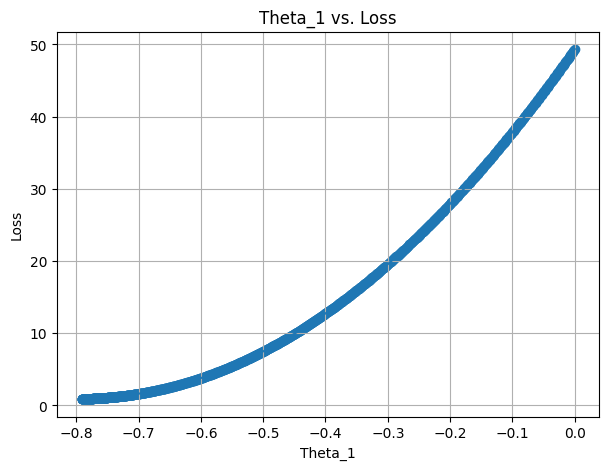

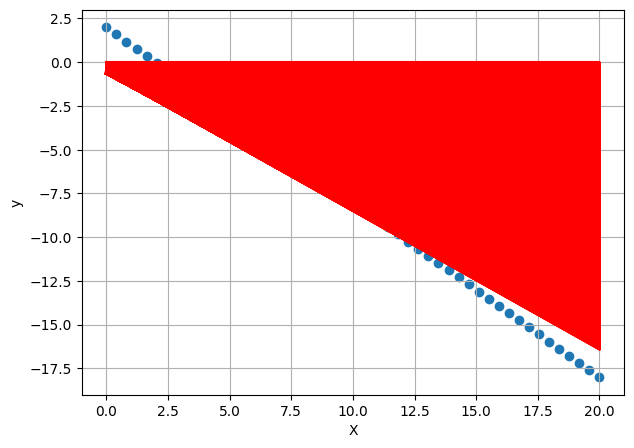

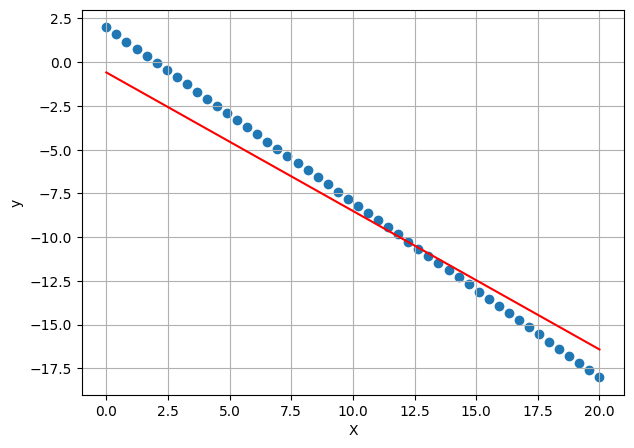

In [44]:
loss_vs_epochs(cost_valsadam6)
theta0_vs_loss(theta_0_valsadam6, cost_valsadam6)
theta1_vs_loss(theta_1_valsadam6, cost_valsadam6)
plot_all_regressions(X, y, y_pred_valsadam6)
plot_best_regression(X, y, y_predadam6)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [45]:
y_predadam7, cost_valsadam7, theta_0_valsadam7, theta_1_valsadam7, theta_0adam7, theta_1adam7, y_pred_valsadam7 = LR_ADAM(X, y, learning_rate=0.001, max_iterations=5000, B1=0.5, B2=0.5)

Streaming output truncated to the last 5000 lines.

Gradient Vector:
[ 0.82806932 20.35436265]

Gradient Vector Norm: 20.371200


****************** Iteration 653 ********************

Predicted Values h(x):
[ -0.65298818  -0.91951642  -1.18604466  -1.4525729   -1.71910114
  -1.98562937  -2.25215761  -2.51868585  -2.78521409  -3.05174233
  -3.31827056  -3.5847988   -3.85132704  -4.11785528  -4.38438351
  -4.65091175  -4.91743999  -5.18396823  -5.45049647  -5.7170247
  -5.98355294  -6.25008118  -6.51660942  -6.78313766  -7.04966589
  -7.31619413  -7.58272237  -7.84925061  -8.11577885  -8.38230708
  -8.64883532  -8.91536356  -9.1818918   -9.44842004  -9.71494827
  -9.98147651 -10.24800475 -10.51453299 -10.78106122 -11.04758946
 -11.3141177  -11.58064594 -11.84717418 -12.11370241 -12.38023065
 -12.64675889 -12.91328713 -13.17981537 -13.4463436  -13.71287184]

Error Vector:
[-2.65298818 -2.51135316 -2.36971813 -2.2280831  -2.08644807 -1.94481305
 -1.80317802 -1.66154299 -1.51990796 -1.3782

In [46]:
print(f"r2 score = {r2_score(y, y_predadam7)}")

r2 score = 0.9475845101116701


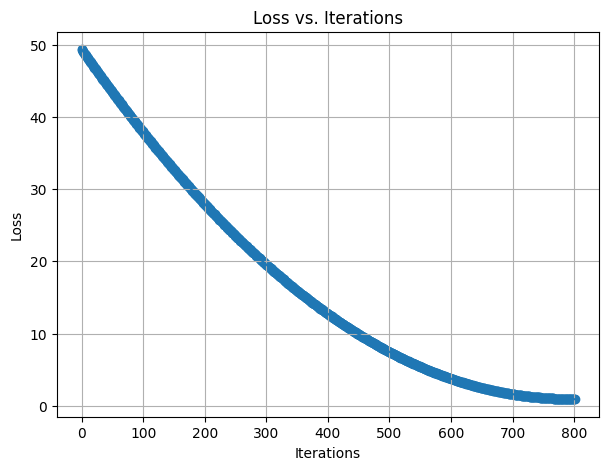

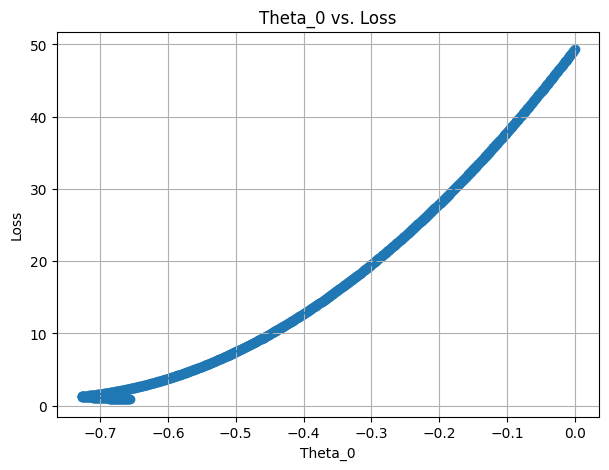

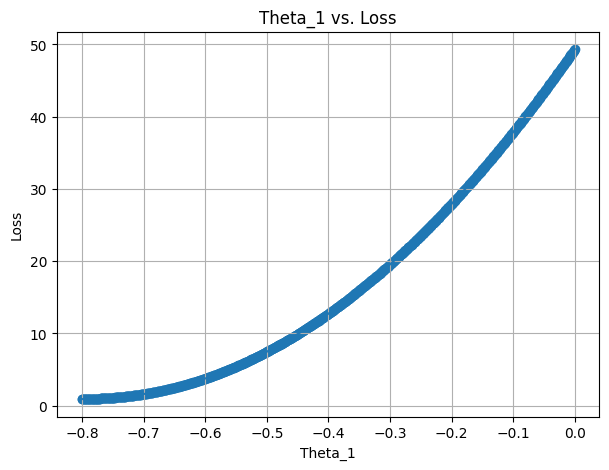

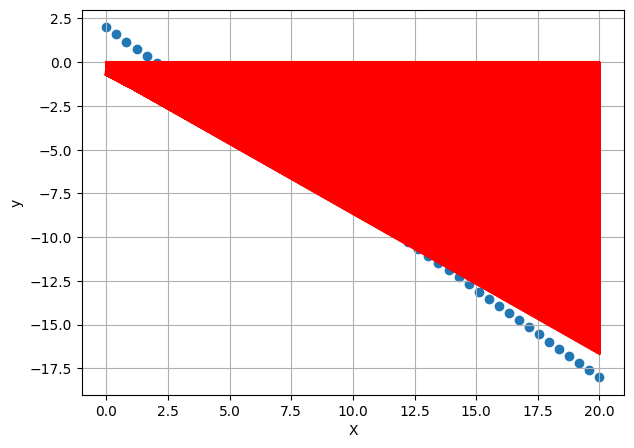

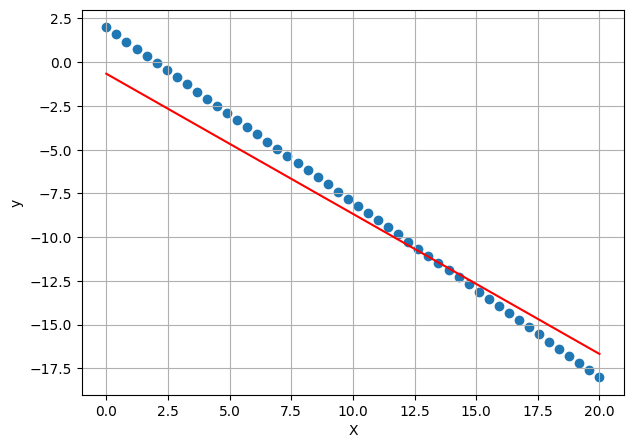

In [47]:
loss_vs_epochs(cost_valsadam7)
theta0_vs_loss(theta_0_valsadam7, cost_valsadam7)
theta1_vs_loss(theta_1_valsadam7, cost_valsadam7)
plot_all_regressions(X, y, y_pred_valsadam7)
plot_best_regression(X, y, y_predadam7)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [48]:
y_predadam8, cost_valsadam8, theta_0_valsadam8, theta_1_valsadam8, theta_0adam8, theta_1adam8, y_pred_valsadam8 = LR_ADAM(X, y, learning_rate=0.01, max_iterations=5000, B1=0.9, B2=0.99)

Streaming output truncated to the last 5000 lines.
[  0.43627767   0.07654398  -0.28318971  -0.6429234   -1.00265709
  -1.36239078  -1.72212447  -2.08185815  -2.44159184  -2.80132553
  -3.16105922  -3.52079291  -3.8805266   -4.24026029  -4.59999397
  -4.95972766  -5.31946135  -5.67919504  -6.03892873  -6.39866242
  -6.75839611  -7.11812979  -7.47786348  -7.83759717  -8.19733086
  -8.55706455  -8.91679824  -9.27653192  -9.63626561  -9.9959993
 -10.35573299 -10.71546668 -11.07520037 -11.43493406 -11.79466774
 -12.15440143 -12.51413512 -12.87386881 -13.2336025  -13.59333619
 -13.95306988 -14.31280356 -14.67253725 -15.03227094 -15.39200463
 -15.75173832 -16.11147201 -16.4712057  -16.83093938 -17.19067307]

Error Vector:
[-1.56372233 -1.51529276 -1.46686318 -1.4184336  -1.37000403 -1.32157445
 -1.27314487 -1.2247153  -1.17628572 -1.12785614 -1.07942657 -1.03099699
 -0.98256741 -0.93413784 -0.88570826 -0.83727868 -0.78884911 -0.74041953
 -0.69198995 -0.64356038 -0.5951308  -0.54670122 -0.498

In [49]:
print(f"r2 score = {r2_score(y, y_predadam8)}")

r2 score = 0.9952892444628807


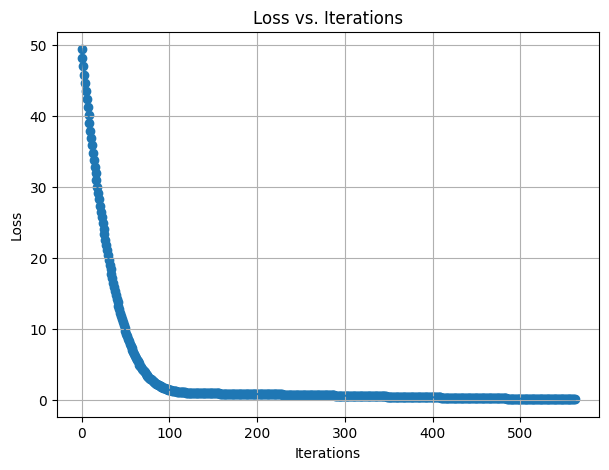

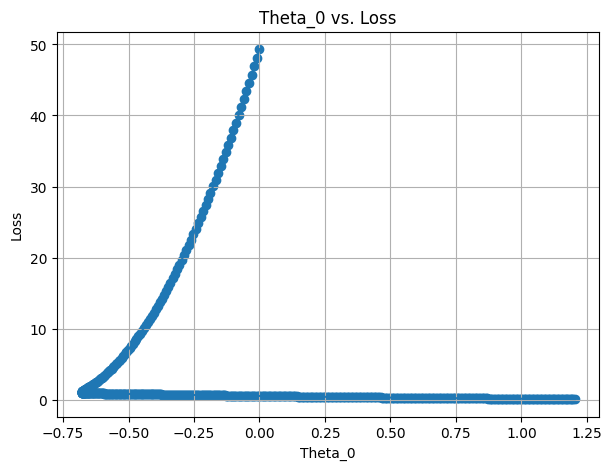

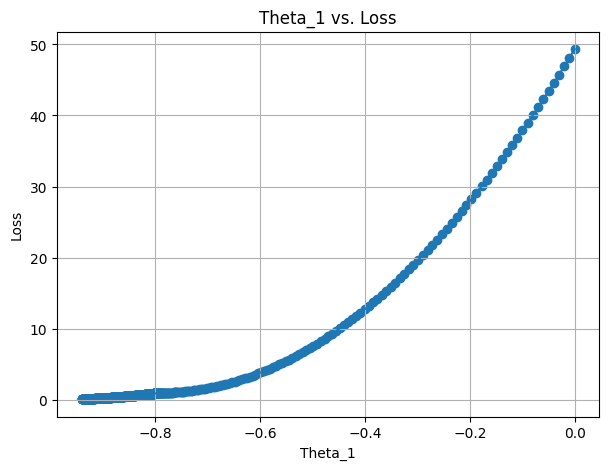

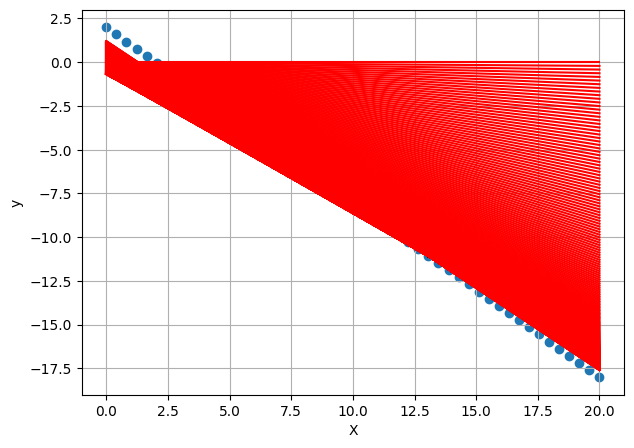

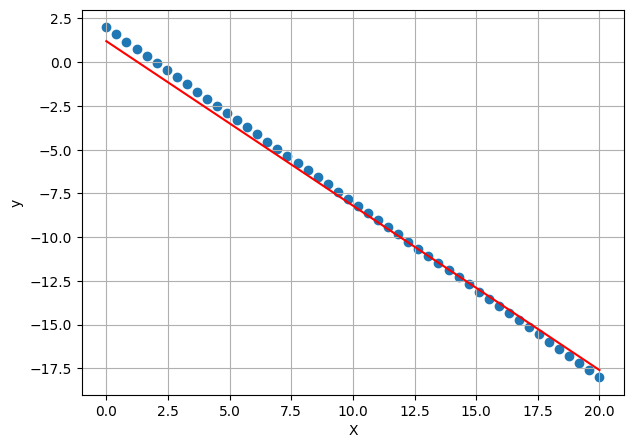

In [50]:
loss_vs_epochs(cost_valsadam8)
theta0_vs_loss(theta_0_valsadam8, cost_valsadam8)
theta1_vs_loss(theta_1_valsadam8, cost_valsadam8)
plot_all_regressions(X, y, y_pred_valsadam8)
plot_best_regression(X, y, y_predadam8)

## Congratulations
![image.png](attachment:image.png)